### 신경망

인공 신경망 (ANN, artificial neural network)은 생물학적 뉴런의 네트워크에서 영감을 받은 머신러닝 모델이다.

인공 신경망은 딥러닝의 핵심이며 다재다능하고 강력하고 확장성이 좋다.

요즘 많이 사용하는 다층 퍼셉트론 (MLP, multi-layer perceptron)부터 살펴본다.

### 퍼셉트론

퍼셉트론은 가장 간단한 인공 신경망 구조로 TLU (threshold logic unit) 또는 LTU (linear threshold unit)라고 불리는 인공 뉴런 (유닛)을 기반으로 한다.

TLU는 입력 $x_1, \cdots, x_n$의 가중치 합

$$ z = w_1 x_1 + w_2 x_2 + \cdots + w_n x_n = \mathbf{x}^{\top} \mathbf{w} $$

을 계산한 뒤 step function을 적용하여 결과를 출력한다.

$h_{\mathbf{w}}(\mathbf{x}) = \mathrm{step}(z) $로 나타낸다.

step function으로는 다음을 이용한다.

$$ \mathrm{heaviside}(z)  = \left \{ \begin{array}{ll} 0 & z<0 \\ 1 & z \geq 0 \end{array} \right.$$

혹은

$$ \mathrm{sgn}(z)  = \left \{ \begin{array}{lll} -1 & z<0 \\  0 & z = 0 \\ 1 & z > 0 \end{array} \right.$$

TLU를 훈련한다는 것은 최적의 $w$들을 찾는 것이다.

퍼셉트론은 layer가 하나뿐인 TLU로 구성된다.

퍼셉트론에서 입력층은 입력 뉴런인 $x_i$들과 항상 1을 출력하는 bias nueron으로 구성된다.

여러 샘플에 대한 인공 뉴런 층의 출력을 다음과 같이 나타낼 수 있다.

$$ h_{\mathbf{w}, \mathbf{b}}(\mathbf{X}) = \phi(\mathbf{X}\mathbf{W} + \mathbf{b}) $$

여기서 $\mathbf{W}$는 비펺향 뉴런에 대한 가중치이고, $\mathbf{b}$는 편향 뉴런에 대한 가중치이다.

$\phi$는 활성화 함수로 비선형적인 결과를 얻기 위해 도입되었다.

초창기에는 계단 함수 등이 사용되었으나, 나중에 살펴볼 역전파 알고리즘이 잘 작동하도록 작동하도록, 활성화 함수를 계단함수가 아닌 시그모이드 함수 등으로 바꾸어 이용한다.

$$ \sigma(z) = \frac{1}{1 + \exp(-z)}$$

그 외에 하이퍼볼릭 탄젠트 함수, ReLU 함수 등이 많이 사용된다.

$$ \tanh(z) = 2 \sigma (2z) - 1$$

$$ \mathrm{ReLU}(z) = \max(0, z) $$

### 다층 퍼셉트론

퍼셉트론을 여러 층 쌓아올린 다층 퍼셉트론 (MLP)은 단층 퍼셉트론의 여러 제약을 줄일 수 있다.

MLP는 input layer 하나와 hidden layer라 불리우는 하나 이상의 TLU 층과 마지막 output layer로 구성된다.

hidden layer를 여러 개 쌓아 올린 인공 신경망을 심층 신경망 (DNN, deep neural network)이라고 한다.

다층 퍼셉트론은 역전파 (backpropagation) 알고리즘이라 불리우는 경사하강법을 이용하여 훈련한다.

### Back propagation

역전파 알고리즘을 요약하자면, 각 훈련 샘플에 대해 역전파 알고리즘이 먼저 예측을 만들고 오차를 계산한다.

그 다음 역방향으로 각 층을 거치면서 각 연결이 오차에 기여한 정도를 측정한다. 

마지막으로 이 오차가 감소하도록 경사하강법을 이용하여 가중치를 조정한다.

$L$개의 hidden layer가 있다고 하자. 

layer 0는 input layer를 뜻하고, layer 1부터 L까지는 hidden layer, layer L+1은 output layer를 뜻한다.

각 layer $\ell$에는 $s_{\ell}$개의 유닛들이 있고, $s_L = K$인 $K$-분류 문제를 생각해 보자.

output layer에서는 softmax 함수를 이용하여 클래스를 결정한다.

파라미터 $w_{ij}^{(\ell)}$는 다음의 두 값들의 관계에 대한 모수이다.

* $\ell-1$번째 layer의 유닛 $j$의 output인 $a_{j}^{(\ell-1)}$과

* $\ell$번째 layer의 유닛 $i$의 중간 output인 $z_{i}^{(\ell)}$ (중간 output이라 함은 활성 함수 적용 전)

즉,

$$ z_{i}^{(\ell)} = \sum_{j=1}^{s_{\ell - 1}} w_{ij}^{(\ell)} a_j^{(\ell-1)}.$$

활성함수 $\phi$는 $z$에 적용된다. 즉,

$$ a_{i}^{(\ell)} = \phi (z_i^{(\ell)}).$$

미분을 통해 다음의 결과를 얻는다.

$$ \frac{\partial z_i^{(\ell)}}{\partial a_j^{(\ell - 1)}} = w_{ij}^{(\ell)}, \quad  \frac{\partial z_i^{(\ell)}}{\partial w_{ij}^{(\ell)}} = a_j^{(\ell - 1)} $$

Output layer의 소프트맥스 함수에 의해 cost function $J$는 다음과 같이 나타낼 수 있다.

$$ J = - \sum_{i=1}^{K} y_i \log p_i$$

여기서 $y_i$는 현재 input이 class $i$에 속하면 1이고 그렇지 않으면 0이다.

또한, 

$$ p_i = \frac{\exp(a_i^{(L)})}{\sum_{k=1}^{K} \exp(a_k^{(L)})} $$

우리의 목적은 cost function $J$에 대해 다음의 값을 계산하는 것이다.

$$ \frac{\partial J}{\partial w_{ij}^{(\ell)}} $$

이를 위해

$$ \delta_{i}^{(\ell)} =  \frac{\partial J}{\partial z_i^{(\ell)}} $$

라고 정의하면, 몇가지 계산 결과

$$ \frac{\partial J}{\partial a_i^{(L)}} = p_i - y_i $$

이고,

$$ \delta_{i}^{(L)} = \frac{\partial J}{\partial z_i^{(L)}} = (p_i - y_i) \phi' \left(z_i^{(L)} \right) $$

이다. hidden layer들에 대해

$$
\delta_{i}^{(\ell)} = \frac{\partial J}{\partial z_{i}^{(\ell)}}= \left( \sum_{j=1}^{s_{\ell + 1}} \frac{\partial J}{\partial z_{j}^{(\ell + 1)}} \frac{\partial z_j^{(\ell + 1)}}{\partial a_i^{(\ell)}} \right) \frac{\partial a_i^{(\ell)}}{\partial z_i^{(\ell)}} = \left( \sum_{j=1}^{s_{\ell + 1}} \delta_i^{(\ell + 1)} w_{ji}^{(\ell + 1)} \right) \phi' (z_i^{(\ell)}).
$$

마지막으로

$$ \frac{\partial J}{\partial w_{ij}^{(\ell)}} = \frac{\partial J}{\partial z_i^{(\ell)}} \frac{\partial z_i^{(\ell)}}{\partial w_{ij}^{(\ell)}} =  \delta_i^{(\ell)} a_j^{(\ell - 1)}.$$

Matrix notation을 이용하면

$$ \delta^{(\ell)} = \left( {\mathbf{W}^{(\ell + 1)}}^{\top} \delta^{(\ell + 1)} \right) \circ \phi'(z^{(\ell)}) $$

$$ \nabla_{\mathbf{W}^{(\ell)}} J  = \delta^{(\ell + 1)} {a^{(\ell)}}^{\top} $$

$$ \nabla_{\mathbf{b}^{(\ell)}} J  = \delta^{(\ell + 1)}  $$

여기서 $\circ$는 elementwise multiplication이다.

위 방법을 이용하면 모든 layer에 대해 gradient 벡터를 구할 수 있고, 이를 통해 경사 하강 업데이트를 적용하여 parameter들을 업데이트 한다.

예를 들어 학습률 $\eta$를 가지고 있으면

$$ w^{(\ell)}_{ij} \leftarrow w_{ij}^{(\ell)} - \eta \frac{\partial J}{\partial w_{ij}^{(\ell)}} $$

### 케라스

Keras는 머신 러닝 플랫폼 TensorFlow에서 실행되는 Python으로 작성된 딥 러닝 API이다. 

빠른 실험을 가능하게 하는 데 중점을 두고 개발되었으며, 아이디어로부터 결과를 가능한 한 빨리 도출할 수 있도록 개발된 툴이다.

한편, TensorFlow 2는 end-to-end 오픈 소스 머신 러닝 플랫폼으로, 다음과 같은 네 가지 주요 기능을 가진다.

* CPU, GPU 또는 TPU에서 낮은 수준의 텐서 작업을 효율적으로 실행한다.

* 임의의 미분 표현식의 기울기를 계산할 수 있다.

* 계산을 multi-gpu 등 여러 장치로 확장한다. 

* 프로그램 ("그래프")을 서버, 브라우저, 모바일 및 임베디드 장치와 같은 외부 플랫폼으로 보낼 수 있음.

Keras는 TensorFlow 2의 고수준 API이며, 현대 딥 러닝에 중점을 두고 있으며, 접근하기 쉽고 생산성이 높은 인터페이스로서 머신 러닝 문제를 해결하기 할 수 있다.

반복 속도가 빠른 기계 학습 솔루션을 개발하고 제공하기위한 필수 추상화 및 빌딩 블록을 제공한다.

Keras는 엔지니어와 연구원이 TensorFlow 2의 확장성과 교차 플랫폼 기능을 최대한 활용할 수 있도록 지원한다. 

TPU 또는 대규모 GPU 클러스터에서 Keras를 실행할 수 있으며 Keras 모델을 내보내 브라우저 또는 모바일에서 실행할 수 있다.

### 케라스 처음 다루기

Keras의 핵심 데이터 구조는 layer와 model이다.

가장 간단한 모델 유형은 계층의 선형 스택인 Sequential 모델이다. 

더 복잡한 아키텍처의 경우 계층의 임의 그래프를 작성하거나 서브 클래스를 통해 처음부터 완전히 모델을 작성할 수있는 Keras 기능 API를 사용해야 한다.

다음은 sequential 모델이다.

In [4]:
from tensorflow.keras.models import Sequential

model = Sequential()

```.add()```를 이용하여 layer들을 쌓는 것이 가능하다.

레이어는 Keras에서 신경망의 기본 구성 요소이다. 

* Input object  
* Dense layer  
* Activation layer  
* Embedding layer  
* Masking layer  
* Lambda layer

#### Dense layer

가장 기본적인 NN 레이어.

Dense는 다음 작업을 구현한다. 

```output = activation(dot(input, kernel) + bias)```


In [5]:
from tensorflow.keras.layers import Dense

model.add(Dense(units=12, activation='relu'))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=1, activation='softmax'))

모델이 좋아 보이면 ```.compile()```을 사용하여 학습 프로세스를 구성한다.

컴파일은 모델 생성의 마지막 단계로 컴파일이 완료되면 훈련 단계로 넘어갈 수 있다.

In [6]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#### Loss
머신러닝에서 Loss 함수는 학습 과정에서 오류나 편차를 찾는 데 사용되며, Keras는 모델 컴파일 과정에서 loss function이 필요하다.

Keras는 상당히 많은 종류의 loss function을 제공한다.

* mean_squared_error  
* mean_absolute_error  
* mean_absolute_percentage_error  
* mean_squared_logarithmic_error  
* squared_hinge  
* hinge  
* categorical_hinge  
* logcosh  
* huber_loss  
* categorical_crossentropy  
* sparse_categorical_crossentropy  
* binary_crossentropy  
* kullback_leibler_divergence  
* poisson  
* cosine_proximity  
* is_categorical_crossentropy

#### Optimizer

기계학습에서 최적화는 예측과 손실 함수를 비교하여 입력 가중치를 최적화하는 중요한 프로세스이다.  
Keras는 다양한 optimaizer를 제공한다.

* SGD − Stochastic gradient descent optimizer.

* RMSprop − RMSProp optimizer.

* Adagrad − Adagrad optimizer.

* Adadelta − Adadelta optimizer.

* Adam − Adam optimizer.

* Adamax − Adamax optimizer from Adam.

* Nadam − Nesterov Adam optimizer.

####  Metrics

기계학습에서 Metrics는 모델의 성능을 평가하는 데 사용되며, 손실 함수와 유사하지만 훈련 과정에서는 사용되지 않는다. 

* accuracy
* binary_accuracy
* categorical_accuracy
* sparse_categorical_accuracy
* top_k_categorical_accuracy
* sparse_top_k_categorical_accuracy
* cosine_proximity
* clone_metric

필요한 경우 최적화 프로그램을 추가로 구성할 수 있다. 
Keras의 철학은 단순한 것을 단순하게 유지하면서 사용자가 필요할 때 완전히 제어 할 수 있도록 하는 것이다. 

In [7]:
from sklearn.datasets import make_circles

X, targets = make_circles(n_samples = 1000, factor=0.1)
X_training = X[250:, :]
X_testing = X[:250, :]
Targets_training = targets[250:]
Targets_testing = targets[:250]

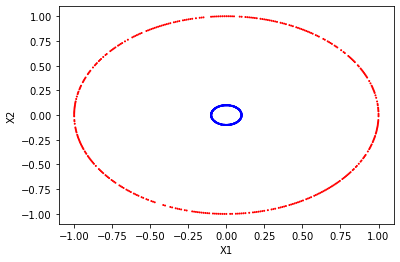

In [8]:
import matplotlib.pyplot as plt
plt.scatter(X_training[:,0], X_training[:,1], Targets_training == 0, color='red')
plt.scatter(X_training[:,0], X_training[:,1], Targets_training == 1, color='blue')

plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

이제 훈련 데이터를 학습할 수 있다.

numpy array들을 이용하여 학습할 수 있으며, ```.fit()``` method를 이용한다.

다음의 문법 구조를 가진다.

```model.fit(X, y, epochs = , batch_size = )```


In [9]:
history = model.fit(X_training, Targets_training, epochs=30, batch_size=5)

Epoch 1/30
150/150 [==============================] - 1s 785us/step - loss: 0.6808 - accuracy: 0.4867
Epoch 2/30
150/150 [==============================] - 0s 812us/step - loss: 0.5782 - accuracy: 0.4924
Epoch 3/30
150/150 [==============================] - 0s 872us/step - loss: 0.4279 - accuracy: 0.5044
Epoch 4/30
150/150 [==============================] - 0s 960us/step - loss: 0.2653 - accuracy: 0.4984
Epoch 5/30
150/150 [==============================] - 0s 846us/step - loss: 0.1397 - accuracy: 0.5164
Epoch 6/30
150/150 [==============================] - 0s 879us/step - loss: 0.0610 - accuracy: 0.4888
Epoch 7/30
150/150 [==============================] - 0s 859us/step - loss: 0.0305 - accuracy: 0.4846
Epoch 8/30
150/150 [==============================] - 0s 1ms/step - loss: 0.0177 - accuracy: 0.4923
Epoch 9/30
150/150 [==============================] - 0s 819us/step - loss: 0.0113 - accuracy: 0.4852
Epoch 10/30
150/150 [==============================] - 0s 812us/step - loss: 0.0077 

In [11]:
test_results = model.evaluate(X_testing, Targets_testing, verbose=1)
print(test_results)

8/8 [==============================] - 0s 1ms/step - loss: 2.3693e-04 - accuracy: 0.5400
[0.0002369283902226016, 0.5400000214576721]


### 케라스를 이용한 다층 퍼셉트론 구현 예제

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [13]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

훈련 세트는 60,000개의 흑백 이미지이며, 각 이미지의 크기는 28x28 픽셀이다.

In [10]:
X_train_full.shape

(60000, 28, 28)

In [11]:
y_train_full.shape

(60000,)

In [15]:
y_train_full

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

전체 훈련 세트를 검증 세트와 (조금 더 작은) 훈련 세트로 나누고, 픽셀 강도를 255로 나누어 0~1 범위의 실수로 바꾼다.

In [17]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

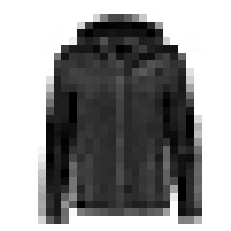

In [54]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [14]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

레이블(label)은 0에서 9까지의 정수 배열로, 이 값은 이미지에 있는 옷의 클래스(class)를 나타낸다.

In [24]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [28]:
# 두 개의 은닉층이 있는 분류용 다층 퍼셉트론 
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

* 첫번째 라인은 Sequential 모델을 만든다. 이 모델은 케라스의 가장 간단한 신경망 모형이다. 순서대로 연결된 층을 일렬로 쌓아 구성한다.
* 그 다음 첫 번째 층을 만들어 추가한다. Flatten 층은 입력 이미지를 1D 배열로 변환한다.
* 그 다음은 뉴런(유닛) 300개를 가진 Dense 층을 추가한다. Dense 층은 각자 가중치 행렬을 관리한다.
* 그 다음은 100개의 유닛을 가진 두 번째 은닉층을 추가한다.
* 마지막으로 소프트맥스 함수를 가진 10개의 Dense 출력층을 추가한다.

In [29]:
# 혹은 아래와 같이 표현할 수도 있다.

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [30]:
model.layers

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


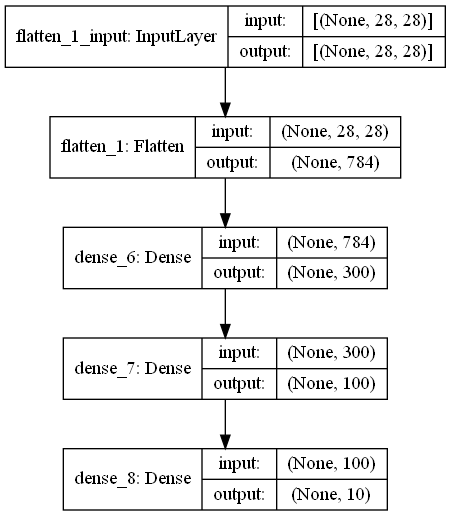

In [32]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [33]:
weights, biases = model.layers[1].get_weights()
weights

array([[-0.03912357,  0.00970527,  0.06963827, ..., -0.01621204,
         0.05539408,  0.00997073],
       [-0.010015  , -0.0145905 ,  0.0034804 , ...,  0.01932115,
        -0.05546685,  0.07317901],
       [-0.02689612, -0.0302739 , -0.04787768, ..., -0.06615918,
         0.03764585,  0.05228804],
       ...,
       [-0.04413144, -0.0133359 , -0.06296924, ..., -0.00500234,
         0.02469081,  0.02409837],
       [-0.0090028 ,  0.05961081, -0.06812663, ...,  0.07195847,
        -0.02779939, -0.07223895],
       [ 0.02804466, -0.04999815, -0.01186527, ...,  0.02160724,
        -0.00989679, -0.06156046]], dtype=float32)

In [34]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

* sparse_categorical_crossentropy는 레이블이 0에서 9까지 정수로 되어 있어 클래스가 베타적이므로 이 손실 함수를 이용하였다.
* 만약 원-핫 벡터로 이루어져 있다면 categorical_crossentropy를 이용한다.
* sgd는 가장 기본적인 확률적 경사 하강법으로 역전파 알고리즘을 수행한다.
* 분류기의 경우 정확도측정을 위해 accuracy를 사용한다.

In [35]:
# 신경망 훈련
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 1.0164 - accuracy: 0.6796 - val_loss: 0.6265 - val_accuracy: 0.7786
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5038 - accuracy: 0.8249 - val_loss: 0.4526 - val_accuracy: 0.8426
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4502 - accuracy: 0.8406 - val_loss: 0.4159 - val_accuracy: 0.8560
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4223 - accuracy: 0.8526 - val_loss: 0.4046 - val_accuracy: 0.8602
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4032 - accuracy: 0.8603 - val_loss: 0.3794 - val_accuracy: 0.8684
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3800 - accuracy: 0.8658 - val_loss: 0.3841 - val_accuracy: 0.8658
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3665 - accuracy: 0.8708 - val_loss: 0.3737 - val_accuracy:

In [36]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [38]:
history

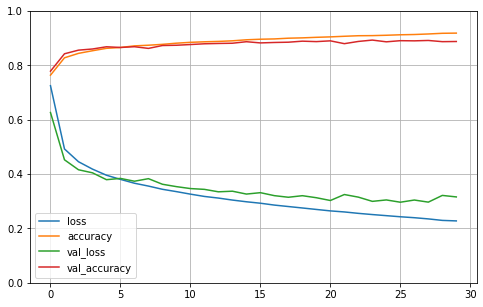

In [37]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [39]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3493 - accuracy: 0.8776


[0.3493482172489166, 0.8776000142097473]

In [50]:
X_new = X_test[:3]
X_new[2]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.2627451 , 0.69411765, 0.50588235, 0.6       , 0.45882353,
        0.50588235, 0.57254902, 0.55294118, 0.68627451, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00784314, 0.        ,
        0.76862745, 1.        , 1.        , 1.        , 0.94509804,
        0.98431373, 1.        , 0.96078431, 1.        , 0.29803922,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.95294118, 0.92941176, 0.85098039, 0.89411765, 0.90588235,
        0.87058824, 0.8549

In [58]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

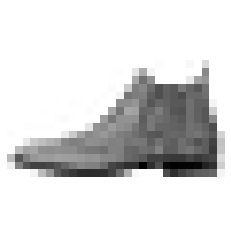

In [55]:
plt.imshow(X_new[0], cmap="binary")
plt.axis('off')
plt.show()

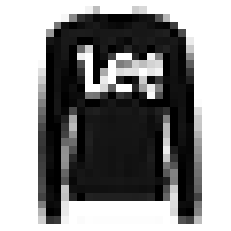

In [56]:
plt.imshow(X_new[1], cmap="binary")
plt.axis('off')
plt.show()

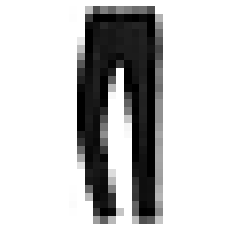

In [57]:
plt.imshow(X_new[2], cmap="binary")
plt.axis('off')
plt.show()

In [53]:
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [60]:
import numpy as np

In [61]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1], dtype=int64)

In [62]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [31]:
y_pred

array([9, 2, 1], dtype=int64)

In [32]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

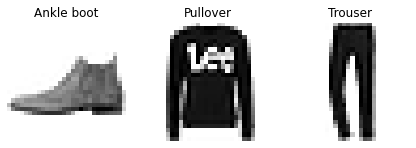

In [33]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

### Hyperparameter

#### 은닉층의 개수

은닉층 하나로 시작해도 많은 문제에서 납득할 만한 결과를 얻을 수 있다.

하지만 복잡한 문제에서는 심층 신경망이 얕은 신경망보다 파라미터 효율성이 좋다.

심층 신경망에서 입력과 가까운 아래쪽 은닉층은 저수준 구조를 모델링하고

중간 은닉층은 저수준 구조를 연결해 중간 수준의 구조를 모델링한다.

가장 위쪽 은닉층과 출력층은 중간 수준의 구조를 연결해 고수준의 구조를 모델링한다.

#### 은닉층의 뉴런 개수

입력층과 출력층의 뉴런 개수는 해당 작업에 필요한 입력과 출력의 형태에 따라 결정된다.

은닉층의 구성방식은 일반적으로 각 층의 뉴런을 점점 줄여서 깔때기처럼 구성한다.

저수준의 많은 특성이 고수준의 적은 특성으로 합쳐질 수 있기 때문이다.

하지만 모든 은닉층에 같은 크기를 사용해도 동일하거나 더 나은 성능을 낸다는 연구결과도 있다.

#### 학습률

좋은 학습률을 찾는 방법은 매우 낮은 학습률 ($10^{-5}$)에서 시작하여 점진적으로 매우 큰 학습률까지 수백 번 반복하여 모델을 훈련하는 것이다.

학습률에 대한 손실을 그래프로 그리며 관찰한다.

학습률은 배치 크기에 영향을 받으므로 배치 크기가 바뀌었으면 학습률도 수정한다.

#### 배치 크기

배치 크기는 모델 성능과 훈련 시간에 큰 영향을 미칠 수 있다.

많은 연구자들은 GPU의 RAM에 맞는 가장 큰 배치 크기를 사용하라고 권장한다.

어떤 학자는 32보다 큰 미니배치를 사용하지 말라고 한다.

하지만 또 어떤 학자들은 학습률 예열 방법을 이용하면 매우 큰 배치 (8,192)를 사용할 수 있다고도 한다.

다음 용어를 정리하라.

* 배치 크기 : 전체 트레이닝 데이터를 여러 개의 미니 배치로 나누었을 때 하나의 미니 배치에 속하는 데이터의 개수  
* 에포크 (epoch) : 전체 트레이닝 셋이 신경망을 통과한 횟수. 즉 1-epoch는 트레이닝 셋의 모든 데이터가 신경망을 한 번 통과했다는 뜻.

#### 활성화 함수

일반적으로 ReLU 활성화 함수가 좋다고 하나 수행하는 작업에 따라 달라질 것이다.

#### 반복 횟수

대부분의 경우 훈련 반복 횟수는 튜닝할 필요가 없고, 조기 종료를 사용한다.

#### MNIST database of handwritten digits 예제

MNIST (Modified National Institute of Standards and Technology database) handwritten digits 데이터는 학습용으로 많이 사용되기 때문에 머신러닝 분야의 Hello world로 불리운다.

In [14]:
mnist = keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

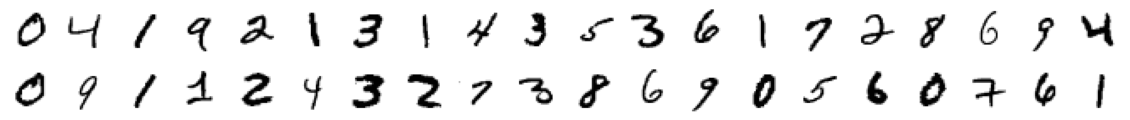

In [15]:
columns = 20
rows = 2
fig = plt.figure(figsize=(columns, rows))
for i in range(1, columns * rows + 1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(x_train[i], cmap="binary")
    plt.axis('off')
plt.show()

In [16]:
for i in range(1, columns * rows + 1): print(y_train[i], end=", ")

0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 

model structure:

* 입력층은 784개의 값이다. (28 x 28 = 784).

* 첫 번째 은닉층은 Dense 층으로 512개의 유닛과 ```relu``` activation function으로 구성

* 두 번째 은닉층은 Dropout 층으로 0.2 값을 가짐.

   * Dropout은 훈련 중에 무작위로 선택된 뉴런을 무시하는 기술로 overfitting을 방지하기 위한 목적이다.

* 세 번째 은닉층은 Dense 층으로 512 뉴런과 ```relu``` activation function으로 구성

* 네 번째 은닉층은 Dropout (0.2)

* 다섯 번째 은닉층은 10개의 뉴런과```softmax``` activation function으로 구성

* loss function : ```categorical_crossentropy```

* Optimizer : ```RMSprop```

* metrics :  ```accuracy```.

* batch size : 128

* epochs : 20

In [18]:
y_train[0]

5

In [19]:
x_train = x_train.reshape(60000, 784) 
x_test = x_test.reshape(10000, 784) 
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32') 
x_train /= 255 
x_test /= 255 

# to_categorical은 벡터를 bianry matrix로 변환함
y_train = keras.utils.to_categorical(y_train, 10) 
y_test = keras.utils.to_categorical(y_test, 10)

In [22]:
y_train[2]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [24]:
from tensorflow.keras.models import Sequential
model = Sequential() 
model.add(keras.layers.Dense(512, activation = 'relu', input_shape = (784,))) 
model.add(keras.layers.Dropout(0.2)) 
model.add(keras.layers.Dense(512, activation = 'relu'))
model.add(keras.layers.Dropout(0.2)) 
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [25]:
model.compile(loss = 'categorical_crossentropy',     
   optimizer = 'RMSprop', 
   metrics = ['accuracy'])

In [26]:
history = model.fit(
   x_train, y_train, 
   batch_size = 128, 
   epochs = 20, 
   verbose = 1, 
   validation_data = (x_test, y_test)
)

Epoch 1/20
469/469 [==============================] - 11s 22ms/step - loss: 0.4356 - accuracy: 0.8635 - val_loss: 0.1234 - val_accuracy: 0.9601
Epoch 2/20
469/469 [==============================] - 10s 21ms/step - loss: 0.1020 - accuracy: 0.9687 - val_loss: 0.0846 - val_accuracy: 0.9745
Epoch 3/20
469/469 [==============================] - 10s 22ms/step - loss: 0.0737 - accuracy: 0.9766 - val_loss: 0.0878 - val_accuracy: 0.9744
Epoch 4/20
469/469 [==============================] - 10s 21ms/step - loss: 0.0550 - accuracy: 0.9830 - val_loss: 0.0720 - val_accuracy: 0.9788
Epoch 5/20
469/469 [==============================] - 11s 23ms/step - loss: 0.0459 - accuracy: 0.9858 - val_loss: 0.0755 - val_accuracy: 0.9830
Epoch 6/20
469/469 [==============================] - 10s 21ms/step - loss: 0.0448 - accuracy: 0.9869 - val_loss: 0.0788 - val_accuracy: 0.9799
Epoch 7/20
469/469 [==============================] - 10s 22ms/step - loss: 0.0349 - accuracy: 0.9896 - val_loss: 0.0716 - val_accuracy:

In [45]:
import numpy as np
for i in range(50): print(np.argmax(y_test[i]), end=", ")

7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 

In [59]:
for result in model.predict(x_test[:50]) : print(np.argmax(result), end=", ")

7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 

prediction :  9
actual :  2


prediction :  2
actual :  4


prediction :  7
actual :  2


prediction :  3
actual :  5


prediction :  7
actual :  3




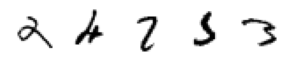

In [63]:
columns = 5
rows = 1
fig = plt.figure(figsize=(columns, rows))
    
count = 1
for i, result in enumerate(model.predict(x_test)):
    if np.argmax(y_test[i]) != np.argmax(result):
        fig.add_subplot(rows, columns, count)
        plt.imshow((x_test[i] * 255).reshape(28, 28), cmap="binary")
        plt.axis('off')
        print("prediction : ", np.argmax(result))
        print("actual : ", np.argmax(y_test[i]))
        print("\n")
        count += 1
        if count == columns + 1 : break
            
plt.show()

#### wine data 예제

In [64]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [65]:
raw_wine = datasets.load_wine()

In [66]:
X = raw_wine.data
y = raw_wine.target

In [67]:
X_tn, X_te, y_tn, y_te = train_test_split(X, y)

In [68]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(13, input_shape=(X_tn.shape[1], ))) # feature 13개
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(3, activation="softmax"))

In [69]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_4 (Dense)              (None, 100)               1400      
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 303       
Total params: 1,885
Trainable params: 1,885
Non-trainable params: 0
_________________________________________________________________


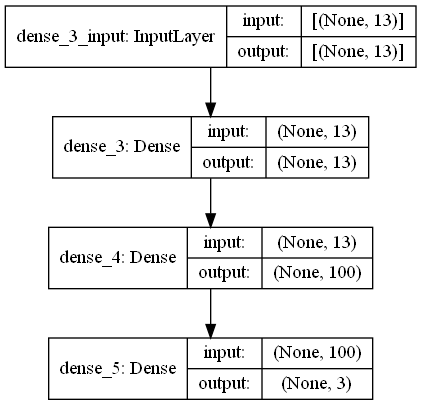

In [70]:
keras.utils.plot_model(model,  show_shapes=True)

In [71]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [72]:
num_epo = 50
history = model.fit(X_tn, y_tn, epochs=num_epo, batch_size=5,
                    validation_data=(X_te, y_te))

Epoch 1/50
27/27 [==============================] - 1s 11ms/step - loss: 54.2658 - accuracy: 0.3917 - val_loss: 6.4520 - val_accuracy: 0.6667
Epoch 2/50
27/27 [==============================] - 0s 3ms/step - loss: 7.6678 - accuracy: 0.4267 - val_loss: 3.2399 - val_accuracy: 0.6000
Epoch 3/50
27/27 [==============================] - 0s 3ms/step - loss: 3.6602 - accuracy: 0.4953 - val_loss: 3.8099 - val_accuracy: 0.6222
Epoch 4/50
27/27 [==============================] - 0s 3ms/step - loss: 4.1164 - accuracy: 0.5089 - val_loss: 1.7677 - val_accuracy: 0.5556
Epoch 5/50
27/27 [==============================] - 0s 3ms/step - loss: 1.2717 - accuracy: 0.6099 - val_loss: 1.7971 - val_accuracy: 0.5778
Epoch 6/50
27/27 [==============================] - 0s 3ms/step - loss: 1.5110 - accuracy: 0.5403 - val_loss: 1.3015 - val_accuracy: 0.6222
Epoch 7/50
27/27 [==============================] - 0s 3ms/step - loss: 1.0672 - accuracy: 0.6445 - val_loss: 2.0757 - val_accuracy: 0.5111
Epoch 8/50
27/27 [

In [73]:
print(model.evaluate(X_tn, y_tn)[1])

5/5 [==============================] - 0s 2ms/step - loss: 0.4062 - accuracy: 0.8271
0.8270676732063293


In [74]:
print(model.evaluate(X_te, y_te)[1])

2/2 [==============================] - 0s 4ms/step - loss: 1.0750 - accuracy: 0.7111
0.7111111283302307


In [75]:
print(history.history["accuracy"])

[0.45864662528038025, 0.43609023094177246, 0.4887218177318573, 0.5413534045219421, 0.6390977501869202, 0.5939849615097046, 0.6015037298202515, 0.6541353464126587, 0.548872172832489, 0.61654132604599, 0.6616541147232056, 0.6616541147232056, 0.646616518497467, 0.61654132604599, 0.6766917109489441, 0.6541353464126587, 0.6090225577354431, 0.5939849615097046, 0.6390977501869202, 0.6917293071746826, 0.6917293071746826, 0.7443609237670898, 0.7218044996261597, 0.646616518497467, 0.7593985199928284, 0.8270676732063293, 0.6766917109489441, 0.6541353464126587, 0.7142857313156128, 0.6992481350898743, 0.7744361162185669, 0.8270676732063293, 0.7293233275413513, 0.7593985199928284, 0.7744361162185669, 0.8496240377426147, 0.8345864415168762, 0.8195488452911377, 0.7142857313156128, 0.7744361162185669, 0.8421052694320679, 0.7669172883033752, 0.61654132604599, 0.6616541147232056, 0.7894737124443054, 0.8120300769805908, 0.8496240377426147, 0.8270676732063293, 0.7518796920776367, 0.8646616339683533]


In [76]:
print(history.history["loss"])

[31.538240432739258, 6.023225784301758, 3.6282730102539062, 3.498533248901367, 1.2285059690475464, 1.4175447225570679, 1.733280897140503, 1.5824915170669556, 2.007570266723633, 2.3245060443878174, 1.3282089233398438, 1.0180386304855347, 1.4229285717010498, 1.777100920677185, 1.3347551822662354, 1.1690260171890259, 2.1763815879821777, 2.6165881156921387, 1.3195507526397705, 1.0658788681030273, 1.4187939167022705, 1.5357129573822021, 1.0351800918579102, 2.074294328689575, 0.6203472018241882, 0.6478243470191956, 1.176221251487732, 1.779407262802124, 2.1232059001922607, 1.5011810064315796, 1.1268306970596313, 0.4297424852848053, 0.8461052179336548, 0.9337223172187805, 0.5506569743156433, 0.4734344184398651, 0.6050409078598022, 0.5832556486129761, 1.415419578552246, 0.8934708833694458, 0.4412883520126343, 1.0162771940231323, 2.0422511100769043, 1.664305329322815, 0.7440171837806702, 0.7255660891532898, 0.5329629778862, 0.6833166480064392, 1.1621471643447876, 0.6122229099273682]


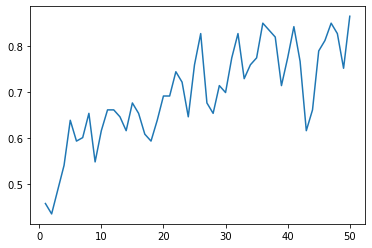

In [77]:
plt.plot(range(1, num_epo+1), history.history["accuracy"])

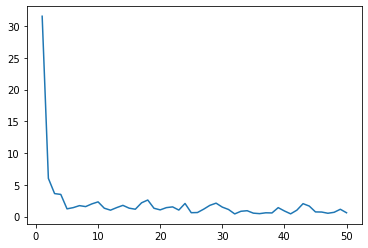

In [78]:
plt.plot(range(1, num_epo+1), history.history["loss"])

#### 영화 리뷰 예제

이 예제는 영화 리뷰(review) 텍스트를 긍정(positive) 또는 부정(negative)으로 분류한다.

In [102]:
imdb = keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

위에서 ```num_words=10000```은 훈련 데이터에서 가장 많이 등장하는 상위 10,000개의 단어를 선택한다. 

이 데이터셋의 샘플은 전처리된 정수 배열로, 영화 리뷰에 나오는 단어를 숫자로 변환한 것이다.

레이블(label)은 정수 0 또는 1로서, 0은 부정적인 리뷰이고 1은 긍정적인 리뷰이다.

In [103]:
train_labels[3]

1

In [104]:
print("훈련 샘플: {}, 레이블: {}".format(len(train_data), len(train_labels)))

훈련 샘플: 25000, 레이블: 25000


In [105]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [106]:
len(train_data[0]), len(train_data[1])

(218, 189)

다음은 정수를 다시 문자열로 변환할 필요가 있을 때 사용하기 위해 만들어졌다.

In [107]:
word_index = imdb.get_word_index()

# 처음 몇 개 인덱스는 사전에 정의되어 있음.
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [108]:
len(train_data[3])

550

데이터 구성

리뷰-정수 배열-는 신경망에 주입하기 전에 텐서로 변환되어야 한다. 변환하는 방법에는 몇 가지가 있다.

* 원-핫 인코딩(one-hot encoding)은 정수 배열을 0과 1로 이루어진 벡터로 변환한다. 예를 들어 배열 ```[3, 5]```을 인덱스 3과 5만 1이고 나머지는 모두 0인 10,000차원 벡터로 변환할 수 있다. 

* 다른 방법으로는, 정수 배열의 길이가 모두 같도록 패딩(padding), 예를 들어 0의 값, 을 추가해 ```max_length * num_reviews``` 크기의 정수 텐서를 만든다. 이런 형태의 텐서를 다룰 수 있는 임베딩(embedding) 층을 신경망의 첫 번째 층으로 사용할 수 있다.

이 예제에서는 두 번째 방식을 사용한다.

In [112]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

In [117]:
train_data[3]

array([1784,   86, 1117,    8, 3261,   46,   11,    2,   21,   29,    9,
       2841,   23,    4, 1010,    2,  793,    6,    2, 1386, 1830,   10,
         10,  246,   50,    9,    6, 2750, 1944,  746,   90,   29,    2,
          8,  124,    4,  882,    4,  882,  496,   27,    2, 2213,  537,
        121,  127, 1219,  130,    5,   29,  494,    8,  124,    4,  882,
        496,    4,  341,    7,   27,  846,   10,   10,   29,    9, 1906,
          8,   97,    6,  236,    2, 1311,    8,    4,    2,    7,   31,
          7,    2,   91,    2, 3987,   70,    4,  882,   30,  579,   42,
          9,   12,   32,   11,  537,   10,   10,   11,   14,   65,   44,
        537,   75,    2, 1775, 3353,    2, 1846,    4,    2,    7,  154,
          5,    4,  518,   53,    2,    2,    7, 3211,  882,   11,  399,
         38,   75,  257, 3807,   19,    2,   17,   29,  456,    4,   65,
          7,   27,  205,  113,   10,   10,    2,    4,    2,    2,    9,
        242,    4,   91, 1202,    2,    5, 2070,  3

In [115]:
decode_review(train_data[3])

"twenty first century to hang out in <UNK> but he is raised on the western <UNK> among a <UNK> speaking community br br yet there is a deeper conflict within him he <UNK> to know the truth the truth behind his <UNK> ancient stories where does fiction end and he wants to know the truth behind the death of his parents br br he is pulled to make a last <UNK> journey to the <UNK> of one of <UNK> most <UNK> mountains can the truth be told or is it all in stories br br in this story about stories we <UNK> bloody battles <UNK> lovers the <UNK> of old and the sometimes more <UNK> <UNK> of accepted truth in doing so we each connect with <UNK> as he lives the story of his own life br br <UNK> the <UNK> <UNK> is probably the most honest <UNK> and genuinely beautiful film of scotland ever made like <UNK> i got slightly annoyed with the <UNK> of hanging stories on more stories but also like <UNK> i <UNK> this once i saw the <UNK> picture ' forget the box office <UNK> of braveheart and its like you 

모델 구성에서는 크게 다음 두 가지를 고려한다.

* 모델에서 얼마나 많은 층을 사용할 것인가?
* 각 층에서 얼마나 많은 은닉 유닛(hidden unit)을 사용할 것인가?

이 예제의 입력 데이터는 단어 인덱스의 배열이며 예측할 레이블은 0 또는 1이다.  
이 문제에 맞는 모델을 구성해야 한다.

In [141]:
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16, input_shape=(None,)))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


위 코드에서

1. 첫 번째 층은 Embedding 층이다. 이 층은 정수로 인코딩된 단어를 입력 받아, 각 단어 인덱스에 해당하는 임베딩 벡터를 찾는다. 임베딩 벡터는 실수로 구성되어 있으며, 단어 간 유사도를 고려하여 생성된다. 단어를 실수 벡터로 변환하는 방법에는 여러가지가 있다.

2. 그 다음 GlobalAveragePooling1D 층은 sequence 차원에 대해 평균을 계산하여 각 샘플에 대해 고정된 길이의 출력 벡터를 반환한다. 이는 길이가 다른 입력을 다루는 가장 간단한 방법이다.

3. 이 고정 길이의 출력 벡터는 16개의 은닉 유닛을 가진 완전 연결(fully-connected) 층(Dense)을 거친다.

4. 마지막 층은 하나의 출력 노드(node)를 가진 완전 연결 층으로. sigmoid 활성화 함수를 사용하여 0과 1 사이의 실수를 출력한다. 이 값은 확률 또는 신뢰도를 나타낸다.

In [142]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [143]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [144]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/40
30/30 [==============================] - 2s 36ms/step - loss: 0.6928 - accuracy: 0.5671 - val_loss: 0.6908 - val_accuracy: 0.6808
Epoch 2/40
30/30 [==============================] - 1s 30ms/step - loss: 0.6893 - accuracy: 0.7233 - val_loss: 0.6842 - val_accuracy: 0.7435
Epoch 3/40
30/30 [==============================] - 1s 31ms/step - loss: 0.6803 - accuracy: 0.7456 - val_loss: 0.6703 - val_accuracy: 0.7215
Epoch 4/40
30/30 [==============================] - 1s 28ms/step - loss: 0.6630 - accuracy: 0.7605 - val_loss: 0.6462 - val_accuracy: 0.7586
Epoch 5/40
30/30 [==============================] - 1s 28ms/step - loss: 0.6327 - accuracy: 0.7863 - val_loss: 0.6094 - val_accuracy: 0.7730
Epoch 6/40
30/30 [==============================] - 1s 33ms/step - loss: 0.5877 - accuracy: 0.8074 - val_loss: 0.5653 - val_accuracy: 0.7959
Epoch 7/40
30/30 [==============================] - 1s 30ms/step - loss: 0.5401 - accuracy: 0.8254 - val_loss: 0.5193 - val_accuracy: 0.8180
Epoch 8/40
30

In [145]:
results = model.evaluate(test_data,  test_labels, verbose=2)

print(results)

782/782 - 1s - loss: 0.3328 - accuracy: 0.8726
[0.33282214403152466, 0.8726000189781189]


In [146]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

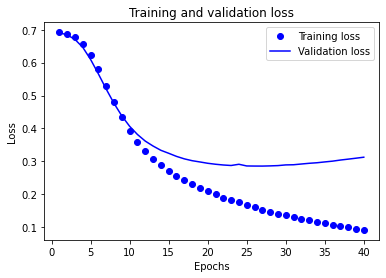

In [147]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"입니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# b는 "파란 실선"입니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

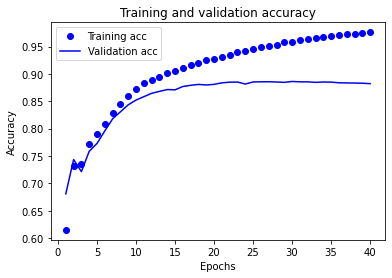

In [148]:
plt.clf()   # 그림을 초기화합니다

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#### embedding example

In [149]:
from numpy import array

# define documents
docs = ['Well done!',
'Good work',
'Great effort',
'nice work',
'Excellent!',
'Weak',
'Poor effort!',
'not good',
'poor work',
'Could have done better.']
# define class labels
labels = array([1,1,1,1,1,0,0,0,0,0])
# integer encode the documents
vocab_size = 50
# pad documents to a max length of 4 words
max_length = 4
padded_docs = keras.preprocessing.sequence.pad_sequences(encoded_docs, maxlen=max_length, padding='post')

In [154]:
# define the model
model = Sequential()
model.add(keras.layers.Embedding(vocab_size, 4, input_length=max_length))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# summarize the model
print(model.summary())
# fit the model
model.fit(padded_docs, labels, epochs=50, verbose=0)
# evaluate the model
loss, accuracy = model.evaluate(padded_docs, labels, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 4, 4)              200       
_________________________________________________________________
flatten_6 (Flatten)          (None, 16)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 17        
Total params: 217
Trainable params: 217
Non-trainable params: 0
_________________________________________________________________
None
Accuracy: 100.000000


In [155]:
first = keras.models.Model(inputs = model.input, outputs = model.layers[0].output)

In [156]:
print(padded_docs)

[[48 19  0  0]
 [16 48  0  0]
 [35 38  0  0]
 [22 48  0  0]
 [24  0  0  0]
 [32  0  0  0]
 [28 38  0  0]
 [31 16  0  0]
 [28 48  0  0]
 [15 20 19 38]]


In [157]:
first.predict(padded_docs)

array([[[ 0.07659974, -0.04562589,  0.07427822, -0.00942713],
        [-0.00767718, -0.07859949, -0.08428611,  0.09410349],
        [-0.05861843, -0.09035654,  0.0309584 , -0.10229893],
        [-0.05861843, -0.09035654,  0.0309584 , -0.10229893]],

       [[ 0.04659014,  0.08904026,  0.0885735 , -0.05198425],
        [ 0.07659974, -0.04562589,  0.07427822, -0.00942713],
        [-0.05861843, -0.09035654,  0.0309584 , -0.10229893],
        [-0.05861843, -0.09035654,  0.0309584 , -0.10229893]],

       [[ 0.04570871, -0.03382295,  0.00152418, -0.01991099],
        [ 0.08908592,  0.0267472 , -0.02202532,  0.05561822],
        [-0.05861843, -0.09035654,  0.0309584 , -0.10229893],
        [-0.05861843, -0.09035654,  0.0309584 , -0.10229893]],

       [[ 0.00142657, -0.00950219,  0.02789904, -0.01887888],
        [ 0.07659974, -0.04562589,  0.07427822, -0.00942713],
        [-0.05861843, -0.09035654,  0.0309584 , -0.10229893],
        [-0.05861843, -0.09035654,  0.0309584 , -0.10229893]],



In [158]:
padded_docs[0]

array([48, 19,  0,  0])